<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Understanding-Sales" data-toc-modified-id="Understanding-Sales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Understanding Sales</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Data-structure" data-toc-modified-id="Data-structure-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Data structure</a></span></li><li><span><a href="#Limitations" data-toc-modified-id="Limitations-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Limitations</a></span></li><li><span><a href="#View-of-All-Data" data-toc-modified-id="View-of-All-Data-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>View of All Data</a></span></li><li><span><a href="#Summary-Stats" data-toc-modified-id="Summary-Stats-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Summary Stats</a></span></li></ul></li><li><span><a href="#Correlations-Between-Health-&amp;-Operations" data-toc-modified-id="Correlations-Between-Health-&amp;-Operations-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Correlations Between Health &amp; Operations</a></span><ul class="toc-item"><li><span><a href="#KPIs" data-toc-modified-id="KPIs-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>KPIs</a></span></li><li><span><a href="#Diseases/Cases" data-toc-modified-id="Diseases/Cases-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Diseases/Cases</a></span></li><li><span><a href="#Sales-Activity" data-toc-modified-id="Sales-Activity-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Sales Activity</a></span><ul class="toc-item"><li><span><a href="#Meets-Sales-Target" data-toc-modified-id="Meets-Sales-Target-1.2.3.1"><span class="toc-item-num">1.2.3.1&nbsp;&nbsp;</span>Meets Sales Target</a></span></li><li><span><a href="#Misses-Sales-Target" data-toc-modified-id="Misses-Sales-Target-1.2.3.2"><span class="toc-item-num">1.2.3.2&nbsp;&nbsp;</span>Misses Sales Target</a></span></li><li><span><a href="#Regressions" data-toc-modified-id="Regressions-1.2.3.3"><span class="toc-item-num">1.2.3.3&nbsp;&nbsp;</span>Regressions</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [1]:
## Setup
# load libs/modules
%run "../utils/load_envz.ipynb"

In [2]:
# Load data set 
DATA_DIR = "../dataset"
DATA_FILE = "targeted_chv_support_ke-20180320.csv" 
dataset = pd.read_csv( "%s/%s" % (DATA_DIR, DATA_FILE) )

dataset.drop( "Phone Number", axis=1, inplace=True )

In [3]:
## themes | variable - outcome mapping
argz_Units = ["CHP ID", "Households Registered"] 
argz_Ops = [ "Sales", "Community Events"]
argz_pregoz = [ "Pregnancy", "PNC Visit Rate", "PNC Visit Missed - #"]
argz_U5_care = ["Total U5 Assessments", "Total U5 Treatments"]
argz_U1_care = ["Total U1 Assessments", "Total U1 Treatments"]
argz_malaria = [ "All Malaria Assessments", "All Malaria Treatments", "Act 6pack Issue", "mRDT Used", "%mRDT"]
argz_U5_diseases = ["U5 Malaria", "U5 Diarrhea", "U5 Pneumonia"]

# "Total U1 Assessments",  assumes U1 follows U5 
argz_EPMs = ["Households Registered", "Sales", "Community Events", "Total Child Assessments", "Pregnancy"]

## Additional Columns
dataset["Country"] = "KE"
dataset["Total Child Assessments"] = dataset["Total U1 Assessments"] + dataset["Total U5 Assessments"]
dataset["Total Child Treatments"] = dataset["Total U1 Treatments"] + dataset["Total U5 Treatments"]
#dataset["HHQuintiles"] = pd.qcut( dataset["Households Registered"], 5, labels=["HH_Quint_1", "HH_Quint_2", "HH_Quint_3", "HH_Quint_4", "HH_Quint_5"])
dnul = pd.Series( ["Households Registered"]).apply( lambda x: quintilize(dataset, x, labelzPrefix="HH_Quints" ) )
dataset["Class_Sales_Levels"] = np.where( dataset["Sales"] < 2040 , "Below_2040", 
                                         np.where(dataset["Sales"] < 4080, "2040_to_4080", 
                                                 np.where(dataset["Sales"] < 6120, "4080_to_6120", 
                                                         np.where(dataset["Sales"] < 8160, "6120_to_8160", 
                                                                 np.where(dataset["Sales"] < 10200, "8160_to_10200", "Above_10K")))) ) 


# Understanding Sales

## Introduction

- Looking at KE CHP data for last 90 days as at 20-Mar-2018


- Some questions of interest
    - What makes sales better?
    - What relationships between sales and health activities? 

- The presented findings are conjectures and not prescriptive or suggestive of causality
    - Need interpretation with more context on how the variables follow from the initiative/program workflows. 


### Data structure 
- There are 1493 CHPs. Each record relates to a CHP.
- Each record is an aggregate of a CHPs activities for the period (90 days until 20-Mar)
- Outliers are excluded in the analysis. Identification of outliers is based on household registration distribution. 


### Limitations
- Data does not have geographic mapping 
- No daily records for time series exploration 



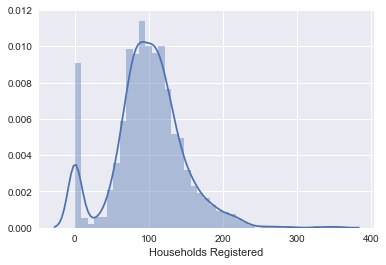

In [4]:
b4_g = sns.distplot( dataset["Households Registered"])
b4_s = sampleStructure(dataset, "Country") 
b4_d = summarizer( dataset )

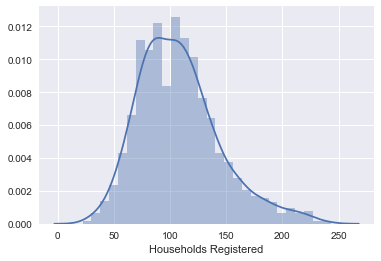

In [5]:

## Remove outliers
# updating dataset to HH > 20 and < 250 
dt_outliers = dataset[ (dataset["Households Registered"] < 20) | (dataset["Households Registered"] > 250) ]
dataset.drop( dt_outliers.index, inplace=True) #<< TODO: go back to boolean indexing

a4_g = sns.distplot( dataset["Households Registered"])
a4_s = sampleStructure(dataset, "Country") 
a4_d = summarizer( dataset )

### View of All Data

For this section outliers are included.

- There are 1493 CHPs in the period
    - Average # households per CHP is 100
    - Total of 148,764 households registered 


- Total Sales of KES 646,630
    - Average sales per CHP is kES 433 
    

In [6]:

print( "All Data Including Outliers - Counts and Averages per CHP")
b4_s

All Data Including Outliers - Counts and Averages per CHP


CHP ID Households Registered                  Sales                \
        # CHPs                 # HHs Avg.CHP.Size KES Sales Avg.CHP Sales   
Country                                                                     
KE        1493                148764        100.0  646630.0         433.0   

             Pregnancy                Community Events                 \
        # Pregoz Cases Avg.CHP Pregoz         # Events Avg.CHP Events   
Country                                                                 
KE                 695            0.0              722            0.0   

        All Malaria Assessments                 Total U5 Assessments  \
                # Malaria Cases Avg.CHP Malaria        # Child Cases   
Country                                                                
KE                         4987             3.0                 9600   

                   Total U1 Assessments             
        Avg.CHP U5           # U1 Cases Avg.CHP U1  
Country                                             
KE             6.0                 2195        1.0

### Summary Stats

For this section outliers are included.


In [7]:
#dataset[ ["Total Child Assessments", "Total Child Treatments", "All Malaria Assessments","U5 Malaria", "U5 Diarrhea", "U5 Pneumonia", "Pregnancy", "Community Events"]].plot(kind="box", figsize=(17,9), ylim=(-5,35))

b4_d

,Pregnancy,PNC Visit Rate,PNC Visit Missed - #,Total U1 Assessments,Total U1 Treatments,Total U5 Assessments,Total U5 Treatments,U5 Malaria,U5 Diarrhea,U5 Pneumonia,...,%mRDT,All Malaria Assessments,All Malaria Treatments,Act 6pack Issue,mRDT Used,Sales,Community Events,Households Registered,Total Child Assessments,Total Child Treatments
count,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,...,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.0,1493.00
mean,0.47,0.22,0.21,1.47,0.57,6.43,2.99,1.72,0.63,0.63,...,0.52,3.34,2.23,4.30,3.34,433.11,0.48,99.64,7.9,3.56
std,0.78,0.40,0.50,1.75,1.05,5.95,3.91,3.00,1.20,1.44,...,0.46,5.24,4.30,9.52,5.24,1199.99,1.07,48.08,7.4,4.73
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,-2156.56,0.00,0.00,0.0,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,75.00,0.0,0.00
50%,0.00,0.00,0.00,1.00,0.00,6.00,2.00,0.00,0.00,0.00,...,0.60,1.00,0.00,0.00,1.00,0.00,0.00,100.00,7.0,2.00
75%,1.00,0.00,0.00,2.00,1.00,11.00,4.00,2.00,1.00,1.00,...,1.00,5.00,3.00,5.00,5.00,347.84,0.00,125.00,13.0,5.00
max,5.00,1.00,4.00,10.00,7.00,37.00,26.00,22.00,11.00,22.00,...,1.00,55.00,51.00,128.00,55.00,18032.34,9.00,356.00,47.0,33.00


## Correlations Between Health & Operations

** *From this section onwards outliers are removed.* **


**Interprating Correlations:** Correlation coefficients whose magnitude are
- between 0.9 and 1.0 indicate variables which can be considered very highly correlated.
- between 0.7 and 0.9 indicate variables which can be considered highly correlated.
- between 0.5 and 0.7 indicate variables which can be considered moderately correlated.
- between 0.3 and 0.5 indicate variables which have a low correlation.
- less than 0.3 have little if any (linear) correlation.
Note though, the above may change depending on nature of outcomes/study. E.G. for social sciences 0.3 may be a threshold for strong correlations. 
- TBD: link reference 


### KPIs

**Community events relate more with child assessments than with sales. ** 
- An expectation is that community events are opportunities for driving sales. 
- Comminity events are most associated with child assessments at 0.35. 
- Association with sales is little if at all at 0.17. 



**We potentially rarely discover new families or households outside of those we already service in some way.** 
- New pregnancies are discovered within already known households whose children are attended to OR vice versa 
    - Pregnancy is most correlated with child assessments (0.28) albeit weakly 
    
- Household registration have not particular associations with the other indicators 
    - Correlations are very low for households registered suggesting little associations 
    - The largest magnitude is 0.15 with pregnancy registration.
 
    
**Child care is delivered around community events and pregnancy registration OR vice versa** 
- Child care is associated with community events (0.35) and pregnancy (0.28)
 

PS: - **Households Registered** could indicate reach.  

1. Correlation of the key KPIs


,Households Registered,Sales,Community Events,Total Child Assessments,Pregnancy
Households Registered,1.000,0.119,0.039,0.079,0.151
Sales,0.119,1.000,0.167,0.099,0.077
Community Events,0.039,0.167,1.000,0.350,0.104
Total Child Assessments,0.079,0.099,0.350,1.000,0.280
Pregnancy,0.151,0.077,0.104,0.280,1.000


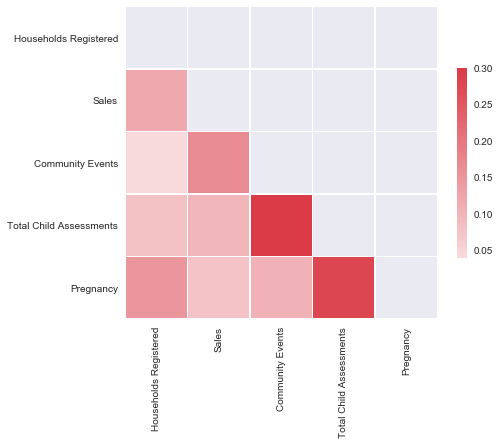

In [8]:
#plotCorrz( corrz(dataset, argz_EPMs) )
print("1. Correlation of the key KPIs")
cout = corrz(dataset, argz_EPMs)
cout
plotCorrz( cout )

### Diseases/Cases

**Malaria: we likely know how to do it well and consistently** 
- There are very strong correlations within malaria variables (see first table below).  
- Malaria is most correlated with child treaments compared to the other diseases (see second table below). 
 
**Pneumonia: Most referral activities may be for pneumonia** and potentially b/c of U1s. 
- Correlation values are large betwen diarrhoea and pneumonia than with malaria. b/c diarrhoea is a symptom of moderate pneumonia 
- Correlation with referral f/u is larger for pneumonia (.26)

In [9]:
## Malaria  
print( "2. Correlation within Malaria Variables")
cout1 = corrz(dataset, argz_malaria+["U5 Malaria"]  )
cout1

2. Correlation within Malaria Variables


,All Malaria Assessments,All Malaria Treatments,Act 6pack Issue,mRDT Used,%mRDT,U5 Malaria
All Malaria Assessments,1.000,0.926,0.882,1.000,0.563,0.858
All Malaria Treatments,0.926,1.000,0.951,0.926,0.473,0.888
Act 6pack Issue,0.882,0.951,1.000,0.882,0.411,0.747
mRDT Used,1.000,0.926,0.882,1.000,0.563,0.858
%mRDT,0.563,0.473,0.411,0.563,1.000,0.508
U5 Malaria,0.858,0.888,0.747,0.858,0.508,1.000


3. Correlation within U5 Diseases


,U5 Malaria,U5 Diarrhea,U5 Pneumonia,Total Child Assessments,Total Child Treatments,On Time Referral f/u Treatment U5
U5 Malaria,1.000,0.144,0.074,0.505,0.825,0.181
U5 Diarrhea,0.144,1.000,0.214,0.353,0.515,0.213
U5 Pneumonia,0.074,0.214,1.000,0.326,0.500,0.256
Total Child Assessments,0.505,0.353,0.326,1.000,0.626,0.390
Total Child Treatments,0.825,0.515,0.500,0.626,1.000,0.309
On Time Referral f/u Treatment U5,0.181,0.213,0.256,0.390,0.309,1.000


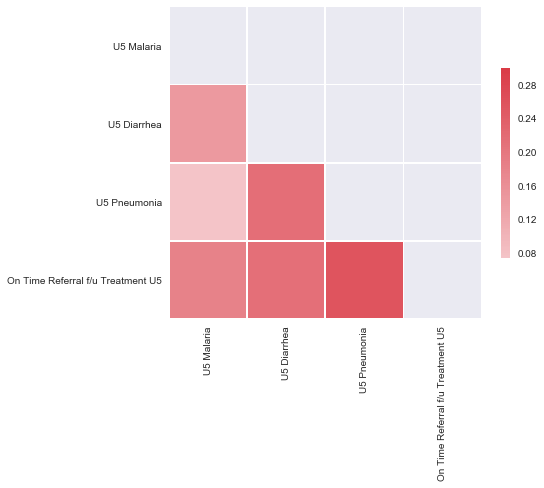

In [10]:
## All U5 Diseases
## Diseases 
print( "3. Correlation within U5 Diseases")
cout2 = corrz(dataset, argz_U5_diseases+["Total Child Assessments", "Total Child Treatments",  "On Time Referral f/u Treatment U5"])
cout2

plotCorrz( corrz(dataset, argz_U5_diseases+["On Time Referral f/u Treatment U5"]) )

### Sales Activity

- Current sales target is KES 2,040. This is used to derive buckets/categories.
- Majority of CHPs (94%) are below that sales target. 
- For reasonable n within the buckets/categories two categories are used: 1) Meets Target and 2). Misses Target.
    - CHPs that meet sales raise 55.5% of total sales
    - CHPs that meet sales target have an average sale of KES 4193, compared to KES 224 by those that don't meet targets


In [11]:

print( "1. n if we bucket sales in multiples of the target amount of KES 2040")
dataset["Class_Sales_Levels"].value_counts()
print("\n\n")

## Regroup
print("2. n when rebucketing so that sample sizes within buckets are reasonable")
dataset["Class_Sales_Levels"] = np.where( dataset["Sales"] < 2040 , "Below_2040", 
                                         np.where(dataset["Sales"] < 4080, "2040_to_4080",  "Above_4080")) 
dataset["Class_Sales_Levels"].value_counts()
print("\n\n")


1. n if we bucket sales in multiples of the target amount of KES 2040


Below_2040       1274
2040_to_4080       65
4080_to_6120        7
6120_to_8160        6
Above_10K           4
8160_to_10200       3
Name: Class_Sales_Levels, dtype: int64




2. n when rebucketing so that sample sizes within buckets are reasonable


Below_2040      1274
2040_to_4080      65
Above_4080        20
Name: Class_Sales_Levels, dtype: int64

In [12]:
## Regroup 
print( "3. n if bucketing into two groups: Meets Target Vs Misses Target (Occam's Razor + dummy variable)")
dataset["Meets.Sales.Target"] = np.where( dataset["Sales"] < 2040, "Misses Target", "Meets Target")
dataset["Meets.Sales.Target"].value_counts()
print("\n\n")
#pd.get_dummies( dataset["Meets.Sales.Target"])


3. n if bucketing into two groups: Meets Target Vs Misses Target (Occam's Razor + dummy variable)


Misses Target    1274
Meets Target       85
Name: Meets.Sales.Target, dtype: int64

In [13]:
print("\n4. Sample Tallies by Sales Target buckets")
sampleStructure(dataset, "Meets.Sales.Target") 
print("\n\n")


4. Sample Tallies by Sales Target buckets


CHP ID Households Registered                  Sales  \
                   # CHPs                 # HHs Avg.CHP.Size KES Sales   
Meets.Sales.Target                                                       
Meets Target           85                 10477        123.0  356408.0   
Misses Target        1274                136018        107.0  285665.0   

                                      Pregnancy                 \
                   Avg.CHP Sales # Pregoz Cases Avg.CHP Pregoz   
Meets.Sales.Target                                               
Meets Target              4193.0             70            1.0   
Misses Target              224.0            618            0.0   

                   Community Events                All Malaria Assessments  \
                           # Events Avg.CHP Events         # Malaria Cases   
Meets.Sales.Target                                                           
Meets Target                     90            1.0                     311   
Misses Target                   629            0.0                    4544   

                                   Total U5 Assessments             \
                   Avg.CHP Malaria        # Child Cases Avg.CHP U5   
Meets.Sales.Target                                                   
Meets Target                   4.0                  728        9.0   
Misses Target                  4.0                 8785        7.0   

                   Total U1 Assessments             
                             # U1 Cases Avg.CHP U1  
Meets.Sales.Target                                  
Meets Target                        189        2.0  
Misses Target                      1982        2.0

** t-tests on the means** 

In [17]:
from scipy.stats import ttest_ind 

print( "a. t-test Sales means between those that meet sales target and those that don't ")
ttest_ind( dataset[dataset["Meets.Sales.Target"] == "Meets Target"]["Sales"], dataset[dataset["Meets.Sales.Target"] == "Misses Target"]["Sales"])

print("\n\n")

print( "b. t-test Household registration means between those that meet sales target and those that don't ")
ttest_ind( dataset[dataset["Meets.Sales.Target"] == "Meets Target"]["Households Registered"], dataset[dataset["Meets.Sales.Target"] == "Misses Target"]["Households Registered"])


print("\n\n")

print( "c. t-test Total child assessments means between those that meet sales target and those that don't ")
ttest_ind( dataset[dataset["Meets.Sales.Target"] == "Meets Target"]["Total Child Assessments"], dataset[dataset["Meets.Sales.Target"] == "Misses Target"]["Total Child Assessments"])

print("\n\n")

print( "d. t-test all malaria assessments means between those that meet sales target and those that don't ")
ttest_ind( dataset[dataset["Meets.Sales.Target"] == "Meets Target"]["All Malaria Assessments"], dataset[dataset["Meets.Sales.Target"] == "Misses Target"]["All Malaria Assessments"])


print("\n\n")

print( "e. t-test pregnacy means between those that meet sales target and those that don't ")
ttest_ind( dataset[dataset["Meets.Sales.Target"] == "Meets Target"]["Pregnancy"], dataset[dataset["Meets.Sales.Target"] == "Misses Target"]["Pregnancy"])


print("\n\n")

print( "f. t-test total U1 assessments means between those that meet sales target and those that don't ")
ttest_ind( dataset[dataset["Meets.Sales.Target"] == "Meets Target"]["Total U1 Assessments"], dataset[dataset["Meets.Sales.Target"] == "Misses Target"]["Total U1 Assessments"])



print("\n\n")


a. t-test Sales means between those that meet sales target and those that don't 


Ttest_indResult(statistic=44.517299519151408, pvalue=1.408771904068549e-267)




b. t-test Household registration means between those that meet sales target and those that don't 


Ttest_indResult(statistic=4.0346041337535041, pvalue=5.774467316712684e-05)




c. t-test Total child assessments means between those that meet sales target and those that don't 


Ttest_indResult(statistic=2.8884203832147652, pvalue=0.003933269344949631)




d. t-test all malaria assessments means between those that meet sales target and those that don't 


Ttest_indResult(statistic=0.16285198887426511, pvalue=0.87065922058432765)




e. t-test pregnacy means between those that meet sales target and those that don't 


Ttest_indResult(statistic=3.7805786498329716, pvalue=0.0001632565828962773)




f. t-test total U1 assessments means between those that meet sales target and those that don't 


Ttest_indResult(statistic=3.4106930414552799, pvalue=0.00066701337703907026)


**SUMMARY**
Working with two groups - 1). Meets Target and 2). Misses Target

- Both groups have association between community events and child assessments. 
    - May be community events are used for child assessments or child assessments are mobilization tool for community events. 


- Both groups have little or no association for sales and other activities
    - No clear association of community events (or the health activities) with sales 


- CHPs that meet targets may be indicative of what a productive/good CHP is.
    - They have higher averages and t-tests on the same show that the  mean differences are statistically significant. 
    - Wonder how their recruitment scores relate and how they can be identified during recruitment. Can we hire more of this type of CHP? 


- CHPs that meet targets seem to have a focused approach to their tasks in that they potentially focus on one priority task at a time.  
    - They may not be combining child care with a sales pitch for instance. They have negative correlations (but very small in magnitude) on "competing" activities.  
        - May be care delivery context does not work well for closing a sale?? 
    - Pregnancy is, however, potentially piggy-backed on the other activities. 



#### Meets Sales Target
- 85 or 6% of the CHPs have met sales target in the period. 


- This group also has higher average household registrations, average pregnancy per CHP and average child assessments per CHP. 
    - t-tests on diferences between those means show statistically significant differences in the means. 
    - They are potentially a representation of strong CHPs.
        - TBD: How does ther performance relate to their graduation scores?

- Ableit small in magnitude, there are negative correlations
    - Household registration has negative association with community events and child assessment. 
    - Sales have negative association with child assessments
    
- Pregnancy registration are most associated with household registration.
    - Wonder if they register more new households during the year (after graduation) compared to those that don't meet targets.

- Sales have little or no association with the other activities. 

- Community events are associated with child assessments.  
    

1. Correlations for Meets Sales Targett


,Households Registered,Sales,Community Events,Total Child Assessments,Pregnancy
Households Registered,1.000,0.024,-0.144,-0.113,0.316
Sales,0.024,1.000,0.097,-0.087,0.088
Community Events,-0.144,0.097,1.000,0.468,0.113
Total Child Assessments,-0.113,-0.087,0.468,1.000,0.298
Pregnancy,0.316,0.088,0.113,0.298,1.000


1b. Visual for Correlations for Meets Sales Targett


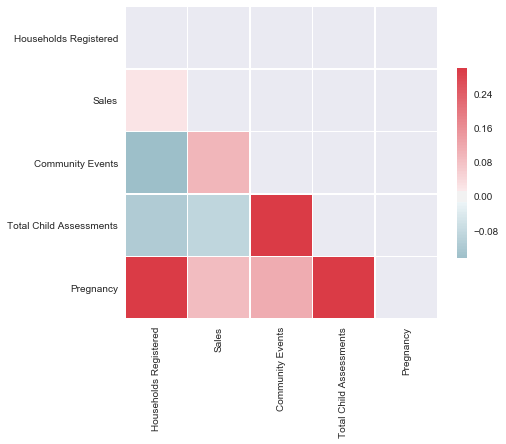

In [15]:
print( "1. Correlations for Meets Sales Targett") 
c1=corrz(dataset[ dataset["Meets.Sales.Target"] == "Meets Target"], argz_EPMs, "spearman") 
c1

print( "1b. Visual for Correlations for Meets Sales Targett")
plotCorrz(c1)

#### Misses Sales Target
- 94% missed sales target of KES 2040.


- This group has similar averages per CHP with the "meet target" group for malaria. 
    - t-tests on diferences between those means show that the groups/means are not statistically significant. They are indeed the similar populations  


- This group has no negative correlations. 


- Households registration is more associated with Sales and pregnancy (0.15: 0.153 and 0.147 respectively). 
    - Could this group be pitching sales during household visits more than the other group? 
    - The magnitudes are low, though 

- Magnitude of sales correlations are larger for this group. However, sales are more associated with child assessment than with community events. 
    - the group that meets sales target has a negative correlation with child assessment. 
    - This group likely makes a sales pitch around each child assessment while the other group doesn't. 
    - **Could it be that pitching during care delivery is not good for closing a sale?** 
    
- Community events are more associated with child assessment for this group as well. 
    

- Pregnancy and child assessment are associated for this group (0.305) just like in the other group, but for this group pregnancy is not as associated with household registration
    - 

2. Correlations for Misses Sales Targett


,Households Registered,Sales,Community Events,Total Child Assessments,Pregnancy
Households Registered,1.000,0.153,0.038,0.096,0.147
Sales,0.153,1.000,0.137,0.177,0.053
Community Events,0.038,0.137,1.000,0.375,0.115
Total Child Assessments,0.096,0.177,0.375,1.000,0.305
Pregnancy,0.147,0.053,0.115,0.305,1.000


2b. Visual for Correlations for Misses Sales Targett


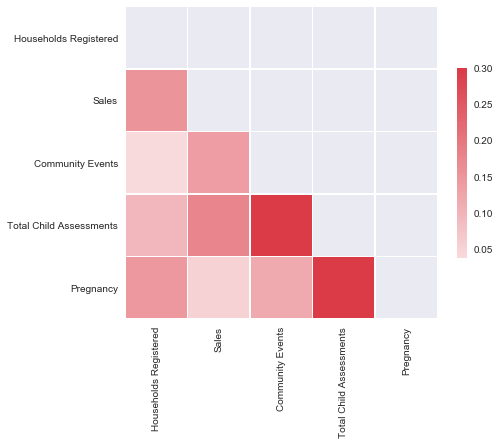

In [16]:
print( "2. Correlations for Misses Sales Targett") 
c1=corrz(dataset[ dataset["Meets.Sales.Target"] == "Misses Target"], argz_EPMs, "spearman") 
c1

print( "2b. Visual for Correlations for Misses Sales Targett")
plotCorrz(c1)

#### Regressions


In [ ]:
## Using R
